<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/Reduzindo_o_churn_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tvaditya/intro_ds_and_ml/main/churn_data.csv')

In [3]:
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
df.shape

(27000, 31)

In [5]:
df.dtypes

user                         int64
churn                        int64
age                        float64
housing                     object
credit_score               float64
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
rewards_earned      

In [6]:
df.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [7]:
df.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [8]:
df.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [9]:
df = df.drop(columns=['credit_score', 'rewards_earned'])

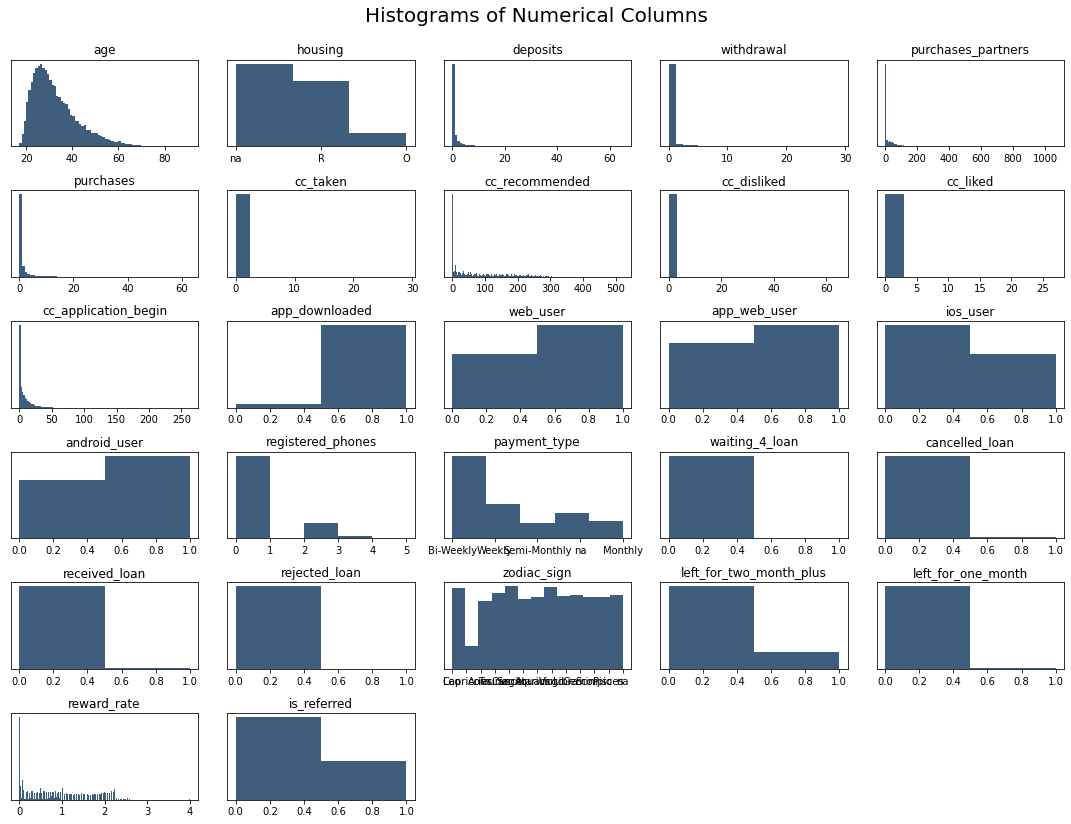

In [10]:
df2 = df.drop(columns = ['user', 'churn'])
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, df2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])

    vals = np.size(df2.iloc[:, i - 1].unique())
    plt.hist(df2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [11]:
# explorando os features desbalanceados
print(df[df2.waiting_4_loan == 1].churn.value_counts())
print(df[df2.cancelled_loan == 1].churn.value_counts())
print(df[df2.received_loan == 1].churn.value_counts())
print(df[df2.rejected_loan == 1].churn.value_counts())
print(df[df2.left_for_one_month == 1].churn.value_counts())

0    27
1     8
Name: churn, dtype: int64
1    274
0    234
Name: churn, dtype: int64
1    292
0    199
Name: churn, dtype: int64
1    107
0     25
Name: churn, dtype: int64
1    266
0    222
Name: churn, dtype: int64


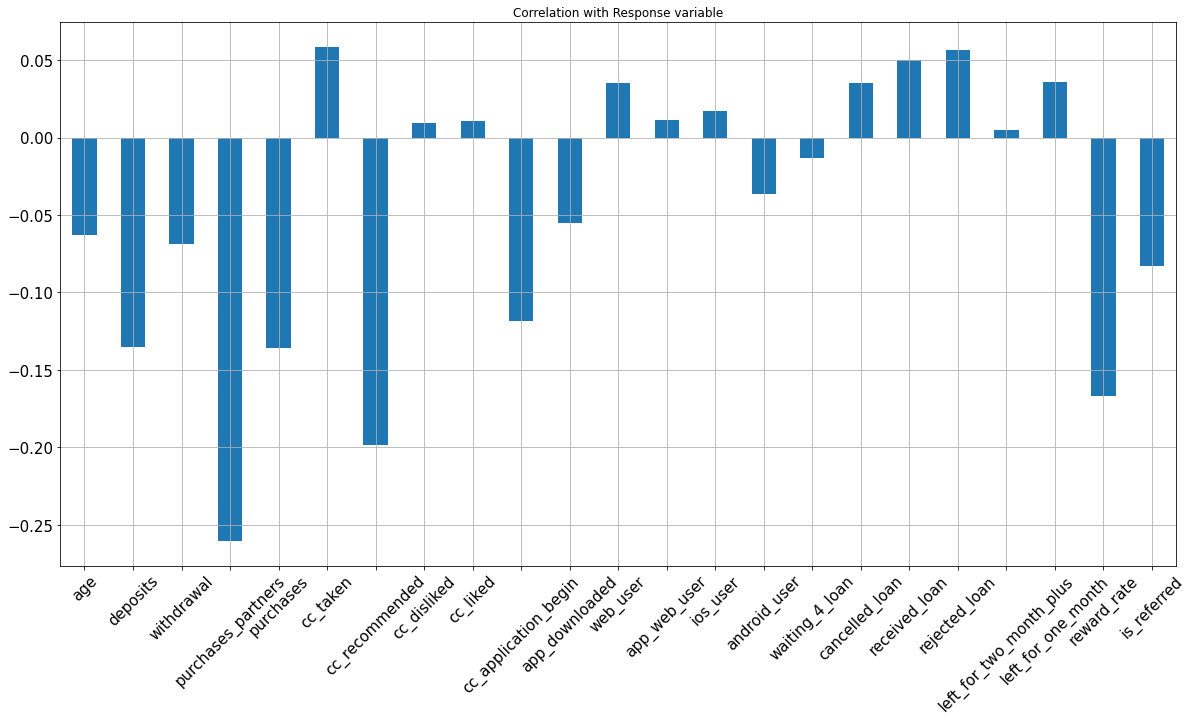

In [12]:
# Correlação com a variável resposta
df2.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign']
    ).corrwith(df.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)


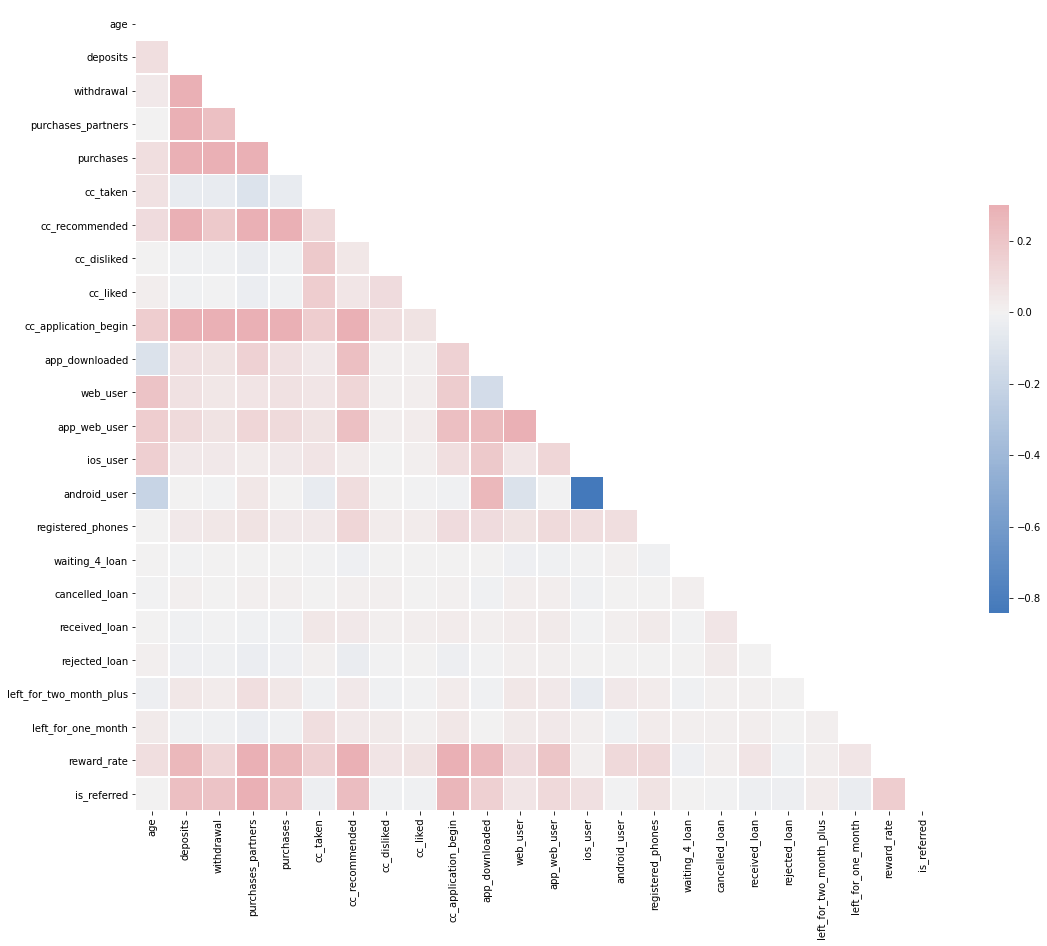

In [13]:
# Compute the correlation matrix
corr = df.drop(columns = ['user', 'churn']).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 15))

cmap = sn.diverging_palette(250, 10, as_cmap=True)

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
df = df.drop(columns = ['app_web_user'])

In [15]:
df.to_csv('new_churn_data.csv', index = False)

In [16]:
df.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,0,0,0,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,0,0,5,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,0,0,9,1,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,0,0,26,1,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,0,0,0,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [17]:
# Model
dataset = df.copy()

In [18]:
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,0,0,0,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,0,0,5,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,0,0,9,1,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,0,0,26,1,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,0,0,0,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [19]:
user_id = dataset['user']
dataset = dataset.drop(columns=['user'])

In [20]:
dataset.housing.value_counts()

na    13860
R     10969
O      2171
Name: housing, dtype: int64

In [21]:
dataset.groupby('housing')['churn'].nunique().reset_index()

,housing,churn
0,O,2
1,R,2
2,na,2


In [22]:
dataset = pd.get_dummies(dataset)

In [23]:
dataset.dtypes

churn                          int64
age                          float64
deposits                       int64
withdrawal                     int64
purchases_partners             int64
purchases                      int64
cc_taken                       int64
cc_recommended                 int64
cc_disliked                    int64
cc_liked                       int64
cc_application_begin           int64
app_downloaded                 int64
web_user                       int64
ios_user                       int64
android_user                   int64
registered_phones              int64
waiting_4_loan                 int64
cancelled_loan                 int64
received_loan                  int64
rejected_loan                  int64
left_for_two_month_plus        int64
left_for_one_month             int64
reward_rate                  float64
is_referred                    int64
housing_O                      uint8
housing_R                      uint8
housing_na                     uint8
p

In [24]:
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])
dataset.isna().sum()

churn                        0
age                          4
deposits                     0
withdrawal                   0
purchases_partners           0
purchases                    0
cc_taken                     0
cc_recommended               0
cc_disliked                  0
cc_liked                     0
cc_application_begin         0
app_downloaded               0
web_user                     0
ios_user                     0
android_user                 0
registered_phones            0
waiting_4_loan               0
cancelled_loan               0
received_loan                0
rejected_loan                0
left_for_two_month_plus      0
left_for_one_month           0
reward_rate                  0
is_referred                  0
housing_O                    0
housing_R                    0
payment_type_Bi-Weekly       0
payment_type_Monthly         0
payment_type_Semi-Monthly    0
payment_type_Weekly          0
zodiac_sign_Aquarius         0
zodiac_sign_Aries            0
zodiac_s

In [25]:
dataset.dropna(inplace=True)
dataset.isna().sum()

churn                        0
age                          0
deposits                     0
withdrawal                   0
purchases_partners           0
purchases                    0
cc_taken                     0
cc_recommended               0
cc_disliked                  0
cc_liked                     0
cc_application_begin         0
app_downloaded               0
web_user                     0
ios_user                     0
android_user                 0
registered_phones            0
waiting_4_loan               0
cancelled_loan               0
received_loan                0
rejected_loan                0
left_for_two_month_plus      0
left_for_one_month           0
reward_rate                  0
is_referred                  0
housing_O                    0
housing_R                    0
payment_type_Bi-Weekly       0
payment_type_Monthly         0
payment_type_Semi-Monthly    0
payment_type_Weekly          0
zodiac_sign_Aquarius         0
zodiac_sign_Aries            0
zodiac_s

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 2021)

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [28]:
y_train.value_counts()

0    12729
1     8867
Name: churn, dtype: int64

In [29]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [30]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [31]:
import random

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))
print(new_indexes)

[  458  4811  9023 ...  1513 18143  8317]


In [32]:
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [33]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [34]:
y_train.isna().sum()

0

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [38]:
cm = confusion_matrix(y_test, y_pred)

In [39]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred)) # tp / (tp + fp)
print(recall_score(y_test, y_pred)) # tp / (tp + fn)
print(f1_score(y_test, y_pred))

0.6270370370370371
0.5459968602825745
0.7537928045080191
0.6332847778587035


Test Data Accuracy:  0.627


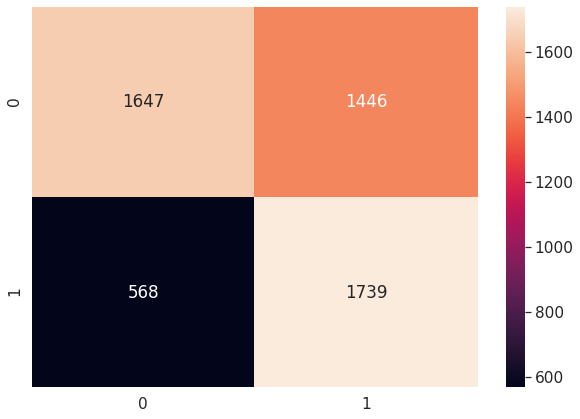

In [40]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print(f"Test Data Accuracy: {accuracy_score(y_test, y_pred): .3f}")

In [41]:
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.159781
1,deposits,0.294520
2,withdrawal,0.043705
3,purchases_partners,-0.745205
4,purchases,-0.413527
5,cc_taken,0.060990
6,cc_recommended,0.032562
7,cc_disliked,-0.014089
8,cc_liked,0.005024
9,cc_application_begin,0.025432


In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [43]:
classifier = LogisticRegression()
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True False False False False  True
 False  True  True False  True  True  True  True  True  True False False
  True  True False False  True  True False False False False False False
 False False False False False]
[ 1  1  1  1  1  1  1 12 17  5 15  1  6  1  1 11  1  1  1  1  1  1 10  2
  1  1  8 18  1  1 22 16  9  3 19 13  4 21 14  7 20]


In [44]:
X_train.columns[rfe.support_]


Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'android_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'housing_R', 'payment_type_Bi-Weekly', 'payment_type_Weekly',
       'zodiac_sign_Aquarius'],
      dtype='object')

In [45]:
corr = X_train[X_train.columns[rfe.support_]].corr()

In [46]:
# Máscara que retira o triângulo superior
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

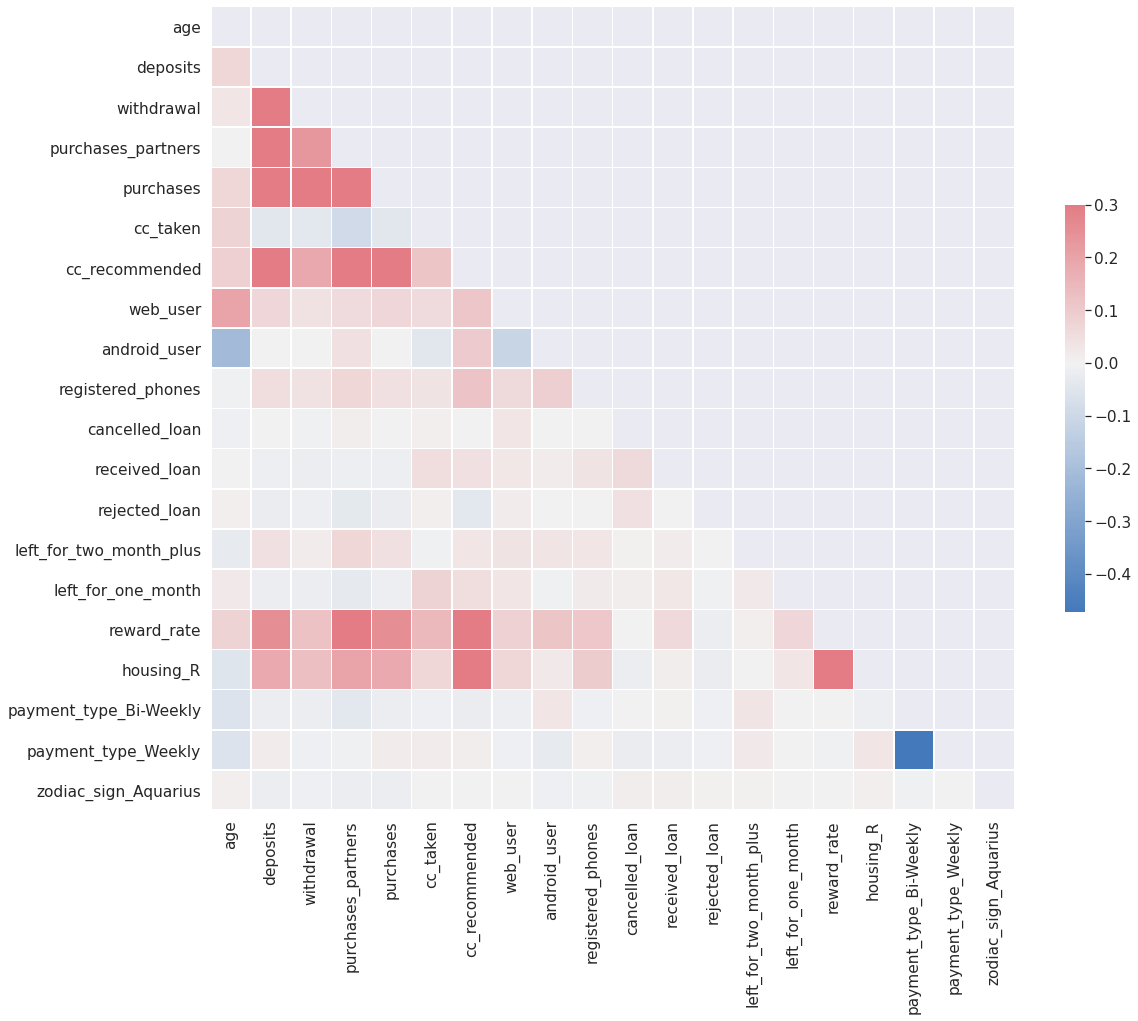

In [47]:
f, ax = plt.subplots(figsize=(18, 15))

cmap = sn.diverging_palette(250, 10, as_cmap=True)

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [48]:
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

In [50]:
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred)) # tp / (tp + fp)
print(recall_score(y_test, y_pred)) # tp / (tp + fn)
print(f1_score(y_test, y_pred))

0.6222222222222222
0.5416536661466459
0.7524924143909839
0.629898403483309


In [51]:
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.162808
1,deposits,0.295325
2,withdrawal,0.047138
3,purchases_partners,-0.737524
4,purchases,-0.407967
5,cc_taken,0.063149
6,cc_recommended,0.043232
7,web_user,0.124244
8,android_user,-0.047696
9,registered_phones,0.122150


In [54]:
final_results = pd.concat([y_test, user_id], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [55]:
final_results

,user,churn,predicted_churn
0,23547,0.0,1
1,41406,0.0,1
2,65427,1.0,1
3,25997,0.0,1
4,13813,1.0,1
...,...,...,...
5395,47206,0.0,0
5396,22377,0.0,0
5397,65830,1.0,0
5398,47663,1.0,1


In [56]:
import joblib

In [58]:
filename='churn_classifier.sav'
joblib.dump(classifier, filename)

['churn_classifier.sav']

In [60]:
loaded_classifier = joblib.load(filename)

In [63]:
y_pred_new = loaded_classifier.predict(X_test[X_train.columns[rfe.support_]])

In [64]:
print(accuracy_score(y_test, y_pred_new))
print(precision_score(y_test, y_pred_new)) # tp / (tp + fp)
print(recall_score(y_test, y_pred_new)) # tp / (tp + fn)
print(f1_score(y_test, y_pred_new))

0.6222222222222222
0.5416536661466459
0.7524924143909839
0.629898403483309


In [65]:
import pickle

In [66]:
filename='churn_classifier_pkl.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [68]:
loaded_classifier = pickle.load(open(filename, 'rb'))

In [69]:
y_pred_new = loaded_classifier.predict(X_test[X_train.columns[rfe.support_]])

In [70]:
print(accuracy_score(y_test, y_pred_new))
print(precision_score(y_test, y_pred_new)) # tp / (tp + fp)
print(recall_score(y_test, y_pred_new)) # tp / (tp + fn)
print(f1_score(y_test, y_pred_new))

0.6222222222222222
0.5416536661466459
0.7524924143909839
0.629898403483309
